In [1]:
# Only needed when FGEM is NOT installed by user
import sys
sys.path.insert(1, '../')

from fgem.world import World
from fgem.utils.config import get_config_from_json
from tqdm.notebook import tqdm

In [2]:
# Read configuration file
config = get_config_from_json('configs/exampleA.json')

# config["upstream"]["reservoir_type"] = "energy_decline"

# config["upstream"]["reservoir_type"] = "diffusion_convection"
# config["upstream"]["lateral_length"] = 2000
# config["upstream"]["V_res"] = 2

config["upstream"]["lateral_length"] = 2000
# config["upstream"]["well_depth"] = 7000
config["metadata"]["drilling_cost"] = 1000
config["upstream"]["reservoir_type"] = "uloop"
# config["upstream"]["closedloop_design"] = "eavor"
config["upstream"]["numberoflaterals"] = 1
config["upstream"]["dx"] = 100
config["metadata"]["reservoir_simulator_settings"] = {"fast_mode": False, "accuracy": 5, "DynamicFluidProperties": False}
config["upstream"]["PumpingModel"] = "ClosedLoop"
config["upstream"]["num_prd"] = 1
config["upstream"]["prd_well_diam"] = 0.3#
config["upstream"]["inj_well_diam"] = 0.3#
config["upstream"]["lateral_diam"] = 0.3#
config["metadata"]["resample"] = "1d"#
config["metadata"]["L"] = 3#


project = World(config)

# Iterate over project lifetime
for i in tqdm(range(project.max_simulation_steps-1)):
    project.step_update_record()

# Compute economics and summary results
project.compute_economics()

# Visualize results
# project.viz_results()

KeyError: 'upstream'

In [12]:
project.reservoir_simulator_settings

{'fast_mode': False,
 'accuracy': 5,
 'DynamicFluidProperties': False,
 'time_passed': inf}

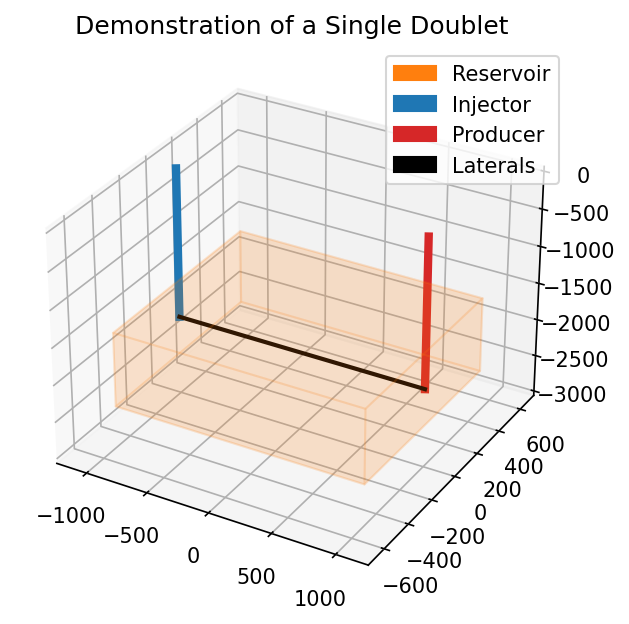

In [13]:
fig = project.reservoir.plot_doublet()

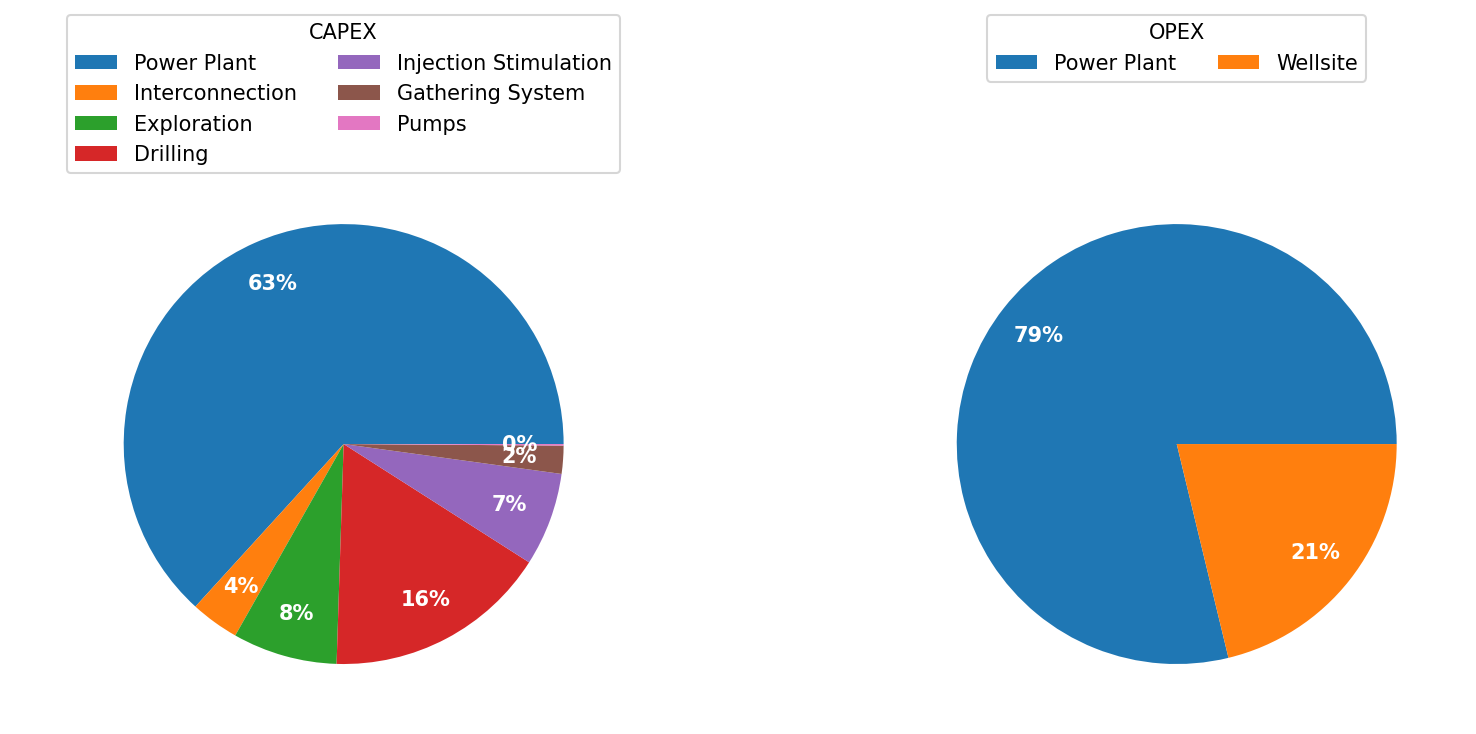

In [14]:
fig = project.plot_economics()

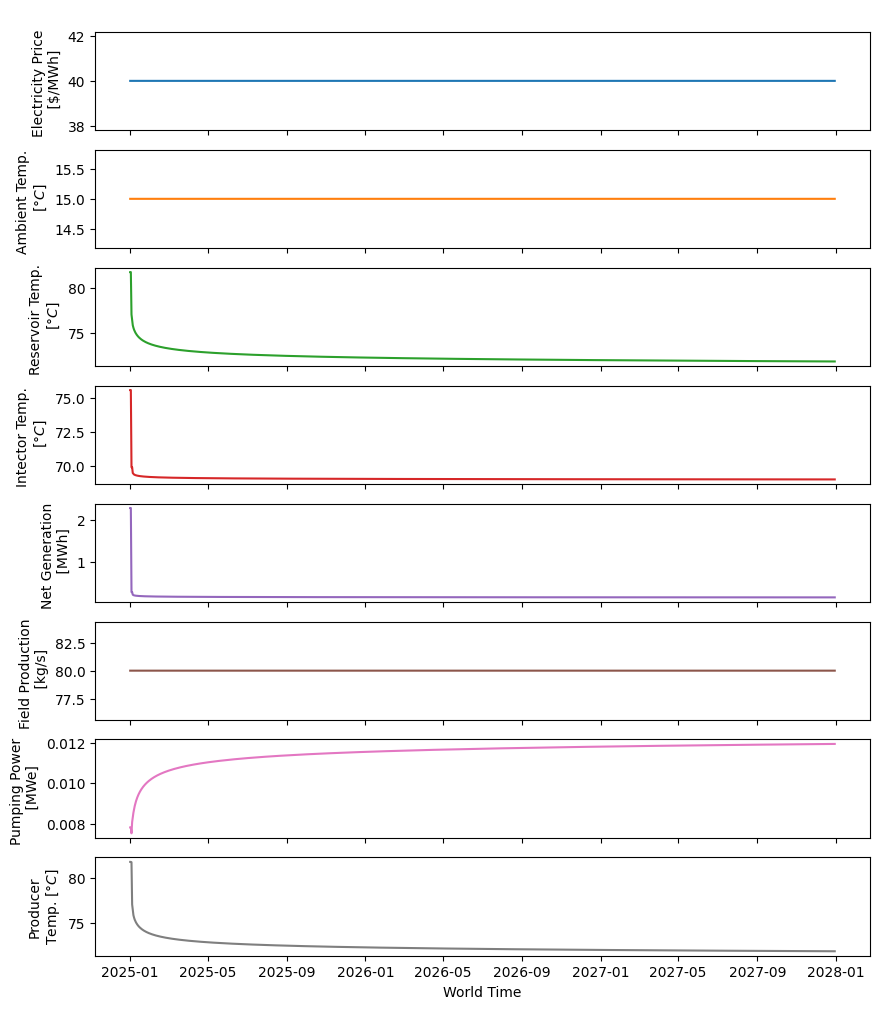

In [15]:
fig = project.plot_operations()

In [3]:
import pandas as pd